# Sankey diagram development

In [1]:
import plotly.graph_objects as go
import btrack
import numpy as np
import json
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from macrohet import visualise, colours
import plotly.graph_objects as go
import matplotlib as mpl
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Liberation Sans'

# Extracting some preliminary data

In [2]:
expt_ID = 'PS0000'
acq_ID = row, column = (3, 5)

In [3]:
tracks_fn = f'/mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/{acq_ID}.h5'
dict_fn = f'/mnt/DATA/macrohet/{expt_ID}/upstream_development/tracking/tracking_performance/v1>70/{row},{column}/{acq_ID}_track_assessment.json'

In [4]:
with btrack.io.HDF5FileHandler(tracks_fn, 'r', obj_type='obj_type_1') as reader:
    tracks = reader.tracks

[INFO][2024/01/04 01:14:58 PM] Opening HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5...
INFO:btrack.io.hdf:Opening HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5...
[INFO][2024/01/04 01:14:58 PM] Loading tracks/obj_type_1
INFO:btrack.io.hdf:Loading tracks/obj_type_1
[INFO][2024/01/04 01:14:58 PM] Loading LBEP/obj_type_1
INFO:btrack.io.hdf:Loading LBEP/obj_type_1
[INFO][2024/01/04 01:14:59 PM] Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
INFO:btrack.io.hdf:Loading objects/obj_type_1 (41424, 5) (41424 filtered: None)
[INFO][2024/01/04 01:14:59 PM] Closing HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5
INFO:btrack.io.hdf:Closing HDF file: /mnt/DATA/macrohet/PS0000/labels/macrohet_seg_model/(3, 5).h5


### Modifying

In [224]:
del_ID = 441

In [225]:
del track_dict[f'{del_ID}']

In [226]:
track_dict[f'{del_ID}'] = False

In [227]:
track_dict[f'{del_ID}']

False

In [228]:
with open(dict_fn, 'w') as json_file:
    json.dump(track_dict, json_file, indent=4) 

In [389]:
df.to_pickle(f'/mnt/DATA/macrohet/{expt_ID}/results/preliminary_sc_measures/sc_dfs/{acq_ID}_<70_sc_df_GT_dev.pkl')


In [229]:
track_dict[f'{del_ID}']

False

In [230]:
df_mod = df[df['Unique ID'] != f'{del_ID}.3.5']
# Save the modified DataFrame back to the same file, overwriting it
df_mod.to_pickle(f'/mnt/DATA/macrohet/{expt_ID}/results/preliminary_sc_measures/sc_dfs/{acq_ID}_<70_sc_df_GT_dev.pkl'
print(len(df_mod[df_mod['Acquisition ID'] == acq_ID]['Unique ID'].unique()))
df_mod

377


,Time (hours),Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,Mphi GFP,x,y,Eccentricity,MSD,Technical Replicate,Strain/Compound,Mtb Area µm2,Mtb RFP,Mtb RFP thresholded
0,0,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,2220.025391,519.922607,876.779602,0.859159,0.000000,1,CTRL,46.797680,473.168976,167.325424
1,1,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,2549.692383,522.290833,876.766357,0.847926,2.368262,1,CTRL,48.719647,498.701813,202.661972
2,2,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,2653.458740,524.336243,874.563110,0.860501,3.006327,1,CTRL,52.206007,502.468353,210.382874
3,3,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,2736.911621,516.952454,876.656799,0.728416,7.674886,1,CTRL,50.552221,501.905182,212.070969
4,4,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,2490.947266,521.947449,880.909363,0.530618,6.560051,1,CTRL,54.463202,502.564423,204.565842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22813,70,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,39979.0,2201.615723,579.509094,651.614807,0.970827,2.473534,1,CTRL,0.000000,378.059143,0.000000
22814,71,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,38456.0,2243.430664,579.219421,651.633118,0.972632,0.290251,1,CTRL,0.000000,377.311035,0.000000
22815,72,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,39006.0,2209.442627,578.878113,652.432434,0.968598,0.869137,1,CTRL,0.000000,378.968353,0.000000
22816,73,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,35816.0,2537.284668,579.752319,652.408752,0.969917,0.874527,1,CTRL,0.000000,379.737701,0.000000


In [231]:

# If you want to confirm that the file has been overwritten, you can reload it and display the DataFrame
df = pd.read_pickle(file_path)

### FIN

In [175]:
with open(dict_fn) as json_data:
    track_dict = json.load(json_data)

In [176]:
true_IDs = [int(ID) for ID in track_dict.keys() if track_dict[ID] == True]

In [177]:
true_tracks = [t for t in tracks if t.ID in true_IDs]

In [178]:
len(true_tracks)

381

In [111]:
len(true_tracks)

384

In [156]:
# updated df to include all shorter tracks with mtb area measurements
df = pd.read_pickle(f'/mnt/DATA/macrohet/{expt_ID}/results/preliminary_sc_measures/sc_dfs/{acq_ID}_<70_sc_df_GT_dev.pkl')
df

,Time (hours),Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,Mphi GFP,x,y,Eccentricity,MSD,Technical Replicate,Strain/Compound,Mtb Area µm2,Mtb RFP,Mtb RFP thresholded
0,0,WT,CTRL,EC0,1.3.5,"(3, 5)",1,29567.0,2220.025391,519.922607,876.779602,0.859159,0.000000,1,CTRL,46.797680,473.168976,167.325424
1,1,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26181.0,2549.692383,522.290833,876.766357,0.847926,2.368262,1,CTRL,48.719647,498.701813,202.661972
2,2,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26043.0,2653.458740,524.336243,874.563110,0.860501,3.006327,1,CTRL,52.206007,502.468353,210.382874
3,3,WT,CTRL,EC0,1.3.5,"(3, 5)",1,25605.0,2736.911621,516.952454,876.656799,0.728416,7.674886,1,CTRL,50.552221,501.905182,212.070969
4,4,WT,CTRL,EC0,1.3.5,"(3, 5)",1,26430.0,2490.947266,521.947449,880.909363,0.530618,6.560051,1,CTRL,54.463202,502.564423,204.565842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22813,70,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,39979.0,2201.615723,579.509094,651.614807,0.970827,2.473534,1,CTRL,0.000000,378.059143,0.000000
22814,71,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,38456.0,2243.430664,579.219421,651.633118,0.972632,0.290251,1,CTRL,0.000000,377.311035,0.000000
22815,72,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,39006.0,2209.442627,578.878113,652.432434,0.968598,0.869137,1,CTRL,0.000000,378.968353,0.000000
22816,73,WT,CTRL,EC0,1015.3.5,"(3, 5)",1015,35816.0,2537.284668,579.752319,652.408752,0.969917,0.874527,1,CTRL,0.000000,379.737701,0.000000


In [157]:
len(df[df['Acquisition ID'] == acq_ID]['Unique ID'].unique())

382

In [136]:
len(df['Unique ID'].unique())

383

In [13]:
len(df[df['Acquisition ID'] == acq_ID]['Unique ID'].unique()) == len(true_tracks)

True

### Start by classifying N_infected vs N_uninf

What classifies as infected versus uninfected? A single frame at t=0 is not enough to say the cell is infected... 

### Start by having a variable that we can vary

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


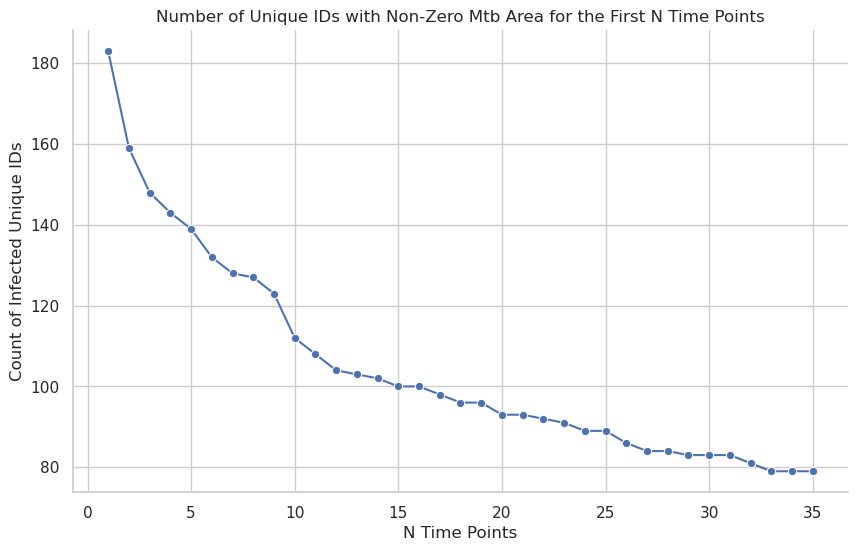

In [14]:
results = []  # To store results for each N

# Iterate over a range of N values
for N in range(1, 36):  # Iterate from 1 to 35

    # Define the function within the loop to capture the current value of N
    def check_non_zero_mtb(group):
        group = group.reset_index(drop=True)
        return (group.head(N)['Mtb Area µm2'] > 0).all()

    # Group by Unique ID and sort within groups by Time (hours)
    grouped = df.sort_values('Time (hours)').groupby('Unique ID')

    # Apply the function to each group and count the True values
    count_infected = grouped.apply(check_non_zero_mtb).sum()

    # Append the result to the results list
    results.append({'N': N, 'Count_Infected': count_infected})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot

# Create the line plot
sns.lineplot(x='N', y='Count_Infected', data=results_df, marker='o')

# Despine the plot
sns.despine()

# Adding title and labels
plt.title('Number of Unique IDs with Non-Zero Mtb Area for the First N Time Points')
plt.xlabel('N Time Points')
plt.ylabel('Count of Infected Unique IDs')

# Show the plot
plt.show()

### Deciding that N = 3 for number of infected frames for a cell to count as initially infected

This ensures that there are three seperate observations that are each an hour apart, I think this is sufficient to nearly guarantee that a cell is infected and not merely co-localising with a clump of mtb. Previous observations (`macrohet/upstream_labelling/classification/what_min_mtb_area_thresh.ipynb`) indicate that a single bacillus is 88 pixels big, so anything above that counts. Using the resolution scale factor, converted to µm^2, this corresponds to `88*((1.4949402023919043e-07*1_000_000)**2) = 1.9666646636802418µm^2`

In [15]:
min_mtb_area_thresh_µm = 88*((1.4949402023919043e-07*1_000_000)**2)

In [46]:
track_ID

'1015.3.5'

In [53]:
track_ID.split('.')[0]

'1015'

In [52]:
track_ID.split('.')[0] in death_IDs

False

In [50]:
died

False

In [234]:
N_init_infected = N_init_uninfected = N_fin_infected = N_fin_uninfected = 0
N_stayed_infected = N_got_infected = N_stayed_uninfected = N_got_uninfected = 0

# Lists to store track IDs for each category
trackIDs_init_infected ,trackIDs_init_uninfected = []
trackIDs_fin_infected = []
trackIDs_fin_uninfected = []
trackIDs_stayed_infected = []
trackIDs_got_infected = []
trackIDs_stayed_uninfected = []
trackIDs_got_uninfected = []

infect_status_dict = {'Initial Infection Status': {}, 'Final Infection Status': {}}

for track_ID in df['Unique ID'].unique():
    subset_df = df[df['Unique ID'] == track_ID]
    
    # Check initial infection status
    initial_infected = all(subset_df.iloc[:3]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
    infect_status_dict['Initial Infection Status'][track_ID] = initial_infected
    if initial_infected:
        N_init_infected += 1
        trackIDs_init_infected.append(track_ID)
    else:
        N_init_uninfected += 1
        trackIDs_init_uninfected.append(track_ID)

    # Check final infection status
    final_infected = all(subset_df.iloc[-3:]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
    infect_status_dict['Final Infection Status'][track_ID] = final_infected
    if final_infected:
        N_fin_infected += 1
        trackIDs_fin_infected.append(track_ID)
    else:
        N_fin_uninfected += 1
        trackIDs_fin_uninfected.append(track_ID)

    # Check transition status
    if initial_infected and final_infected:
        N_stayed_infected += 1
        trackIDs_stayed_infected.append(track_ID)
    elif not initial_infected and final_infected:
        N_got_infected += 1
        trackIDs_got_infected.append(track_ID)
    elif initial_infected and not final_infected:
        N_got_uninfected += 1
        trackIDs_got_uninfected.append(track_ID)
    elif not initial_infected and not final_infected:
        N_stayed_uninfected += 1
        trackIDs_stayed_uninfected.append(track_ID)


In [60]:
N_init_infected, N_init_uninfected, N_fin_infected, N_fin_uninfected 

(125, 259, 224, 160)

In [67]:
sum([N_init_infected, N_init_uninfected, N_fin_infected, N_fin_uninfected ])

768

In [18]:
N_init_infected, N_init_uninfected #: Counts of initially infected and uninfected


(125, 259)

In [19]:
N_fin_infected, N_fin_uninfected #: Counts of finally infected and uninfected


(224, 160)

In [20]:
N_stayed_infected, N_got_infected, N_stayed_uninfected, N_got_uninfected #: Transition counts

(111, 113, 146, 14)

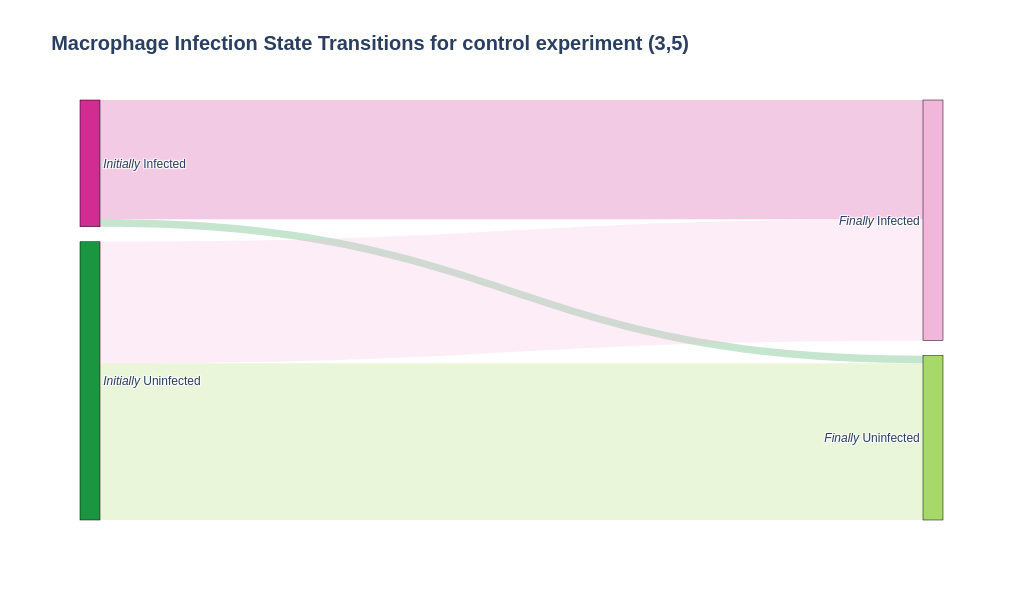

In [235]:

# Define source, target, and value for Sankey diagram
source = [0, 0, 1, 1]  # 0: Initially Infected, 1: Initially Uninfected
target = [2, 3, 2, 3]  # 2: Finally Infected, 3: Finally Uninfected
value = [
    N_stayed_infected,     # Initially Infected -> Finally Infected
    N_got_uninfected,      # Initially Infected -> Finally Uninfected
    N_got_infected,        # Initially Uninfected -> Finally Infected
    N_stayed_uninfected    # Initially Uninfected -> Finally Uninfected
]
# Assuming colours.expanded_piyg is a list of hex colors
link_colors = [f'rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.25)' for color in [colours.expanded_piyg[i] for i in [-1, 0, -2, 1]]]

# Define labels for nodes
labels = ["<i>Initially</i> Infected", "<i>Initially</i> Uninfected", "<i>Finally</i> Infected", "<i>Finally</i> Uninfected"]
node_colors =  [colours.expanded_piyg[i] for i in [-1,0, -2, 1]] #['blue', 'green', 'red', 'yellow']  # Example node colors

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,        
        color=node_colors  # Set node colors

    ),
    link=dict(
        source=source,
        target=target,
        value=value, 
        color=link_colors
    ))])

fig.update_layout(
    title_text="Macrophage Infection State Transitions for control experiment (3,5)",
    # font_size=12,
    width=800,  # Set the width of the figure
    height=600,  # Set the height of the figure
    font_family="Liberation Sans", 
    title=dict(text="<b>Macrophage Infection State Transitions for control experiment (3,5)<b>", font=dict(size=20),)
)

fig.write_html("WIP-sankey-diagram.html")
fig.show()

### Why are cells becoming UNinfected? 

In [22]:
trackIDs_got_uninfected

['507.3.5',
 '536.3.5',
 '93.3.5',
 '1539.3.5',
 '592.3.5',
 '616.3.5',
 '112.3.5',
 '285.3.5',
 '297.3.5',
 '310.3.5',
 '1335.3.5',
 '1356.3.5',
 '432.3.5',
 '441.3.5']

#### Recording the actual fate of these cells

In [25]:
actual_fate = {432:'death',
               441:'death',
               1356:'death',
               1335:'ID_switch',
               310:'unknown',
               297:'unknown',
               285:'efferocytosis',
               112:'death',
               616:'lost',
               592:'ID_switch', 
               1539:'ID_switch',
               93:'ID_switch',
               536:'why is this classified as finally uninfected?',
               507:'death'}

## Find a way of automatically classifying cell death

Then will be in a better position to assess if the ID switches in last couple of frames are problematic or can be assigned cell death

#### Idea #1 Sudden position change (doesn't work)

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: ylabel='MSD'>

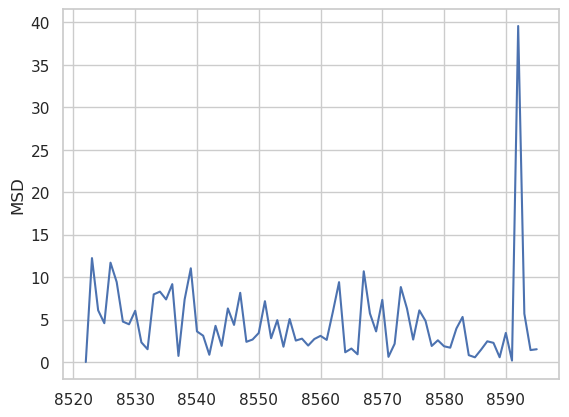

In [26]:
sns.lineplot(df[df['Unique ID'] == '507.3.5']['MSD'])

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/dayn/miniconda3/envs/brassica/lib/python3.9/site-packa

5.625354952064658
4.577640252997138
8.746086251583042
7.549598815135756
4.46653886380092


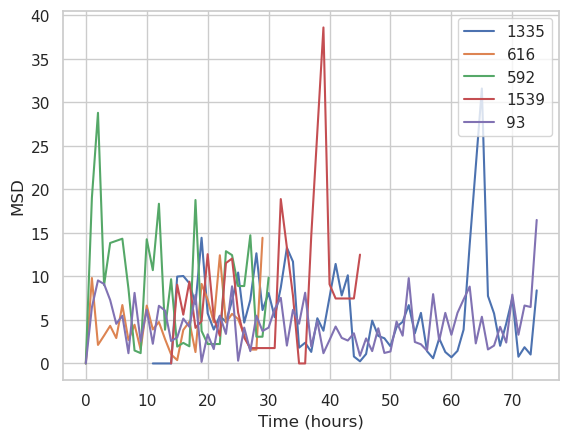

In [27]:
for i in [1335,616,592,1539,93]:
    ID = str(i)+'.3.5'
    subset_df = df[df['Unique ID'] == ID]
    sns.lineplot(data = subset_df, x = 'Time (hours)', y = 'MSD', label = i)
    average_MSD = subset_df['MSD'].mean()
    print(average_MSD)

In [28]:
IDs = []
for ID in df['Unique ID'].unique():
    subset_df = df[df['Unique ID'] == ID]
    average_MSD = subset_df['MSD'].mean()
    std_MSD = subset_df['MSD'].std()
    if subset_df['MSD'].max() > (average_MSD + 6* std_MSD):
        print(subset_df['MSD'].max(), average_MSD, std_MSD, ID)
        IDs.append(ID)
    # threshold = average_MSD + 2* std_MSD
    # print(threshold, ID)
    # unusual_tracks = df[df['MSD'] > threshold]
    # unusual_tracks['Unique ID'].unique()
    # break

19.252255564084155 2.8697947158322497 2.59224372259803 336.3.5
39.88859271934487 5.897799649768108 5.480536255835153 401.3.5
24.992365121733112 3.8833496024332144 3.484262039598977 459.3.5
39.56796106749707 4.70381931349342 5.097957882558075 507.3.5
39.91275188361972 5.569993939492445 5.595830608030695 77.3.5
35.7296567039952 4.03710602362287 5.278632527411179 1611.3.5


In [29]:
IDs

['336.3.5', '401.3.5', '459.3.5', '507.3.5', '77.3.5', '1611.3.5']

In [30]:
msds = []
for ID in unusual_tracks['Unique ID'].unique():
    msds.append(unusual_tracks[unusual_tracks['Unique ID'] == ID]['MSD'].mean())
sns.histplot(msds)

NameError: name 'unusual_tracks' is not defined

In [ ]:
msds = []
for ID in df['Unique ID'].unique():
    msds.append(df[df['Unique ID'] == ID]['MSD'].mean())
sns.histplot(msds)

In [ ]:
unique_ids = ['93.3.5', '1335.3.5', '616.3.5', '592.3.5', '1539.3.5', '93.3.5']
are_all_ids_present = all(id in unusual_tracks['Unique ID'].unique() for id in unique_ids)

print("Are all unique IDs present in the unusual tracks?:", are_all_ids_present)
present_ids = [id for id in unique_ids if id in unusual_tracks['Unique ID'].unique()]
count_present_ids = len(present_ids)
print("Present IDs:", present_ids)


In [ ]:
threshold

### Idea #2 Drop in gfp?

In [ ]:

for unique_ID in trackIDs_got_uninfected:
    subset_df = df[df['Unique ID'] == unique_ID]
    sns.lineplot(data = subset_df, 
         y = 'Mphi GFP', 
         x = 'Time (hours)', 
         # label = unique_ID+' Mtb'
        )

### Idea #3 drop in area combined with loss of gfp


Loss of GFP will happen at the end of the track life time, 3sd below average is currently good, 2sd below is too much... 2.5 too, what if I coupple this with a track ending early?

In [35]:
subset_df.keys()

Index(['Time (hours)', 'Strain', 'Compound', 'Concentration', 'Unique ID',
       'Acquisition ID', 'Cell ID', 'Mphi Area', 'Mphi GFP', 'x', 'y',
       'Eccentricity', 'MSD', 'Technical Replicate', 'Strain/Compound',
       'Mtb Area µm2', 'Mtb RFP', 'Mtb RFP thresholded'],
      dtype='object')

In [36]:
IDs = []
for ID in df['Unique ID'].unique():
    subset_df = df[df['Unique ID'] == ID]
    average_area = subset_df['Mphi Area'].mean()
    std_area = subset_df['Mphi Area'].std()
    if subset_df['Mphi Area'].min() < (average_area - 2.75 * std_area):
        if subset_df['Mphi Area'].min() in subset_df['Mphi Area'].iloc[-10:].values:
            print(subset_df['Mphi Area'].min(), average_area, std_area, ID)
            IDs.append(ID)

13878.0 58817.426666666666 13718.053476609468 444.3.5
30086.0 59791.16216216216 6735.364437825878 530.3.5
18707.0 69287.41333333333 13017.228475820486 542.3.5
13593.0 61879.05405405405 14228.598819040562 552.3.5
21924.0 52276.333333333336 10779.02601944758 602.3.5
15414.0 64446.96363636364 15191.44908110607 1118.3.5
12394.0 38012.21875 8198.069099932125 1129.3.5
2036.0 16072.658536585366 3857.5332183259034 628.3.5
3016.0 21839.310344827587 5600.647884100095 642.3.5
4787.0 25458.083333333332 6809.588309822801 131.3.5
4540.0 22679.126984126986 5821.47350677357 204.3.5
12696.0 128198.68253968254 34931.332811594344 1356.3.5
7093.0 25920.26984126984 5187.906368712469 344.3.5
20346.0 33412.5 4408.763335160387 410.3.5
11953.0 39067.333333333336 6823.153896948923 461.3.5
39174.0 104000.83606557376 12905.309667187803 997.3.5
51144.0 88981.25 10388.504871918798 493.3.5


In [37]:
IDs

['444.3.5',
 '530.3.5',
 '542.3.5',
 '552.3.5',
 '602.3.5',
 '1118.3.5',
 '1129.3.5',
 '628.3.5',
 '642.3.5',
 '131.3.5',
 '204.3.5',
 '1356.3.5',
 '344.3.5',
 '410.3.5',
 '461.3.5',
 '997.3.5',
 '493.3.5']

#### Automatically identified cell death with manually ID'd

In [74]:
death_IDs = [432,
 431,
 354,
 397,
 426,
 424,
 1308,
 384,
 1611,
 473,
 491,
 3179,
 486,
 515,
 15,
 34,
 119,
 112,
 26,
 110,
 144,
 252,
 286,
 107,
 444,
 530,
 542,
 552,
 1118,
 642,
 131,
 204,
 1356,
 344,
 410,
 461,
 997,
 493, 
 507]

death_IDs = [str(ID)+'.3.5' for ID in death_IDs]

### Incorporating efferocytosis

In [240]:
eff_IDs = ['285.3.5']

#### Incorporating manually identified dead cells

In [312]:
### this is for actually plotting
# init and fin status
N_init_infected = N_init_uninfected = N_fin_infected = N_fin_uninfected = N_fin_dead = N_fin_eff = 0
# transition status
N_stayed_infected = N_got_infected = N_stayed_uninfected = N_got_uninfected = N_infected_died = N_uninfected_died = N_infected_eff = N_uninfected_eff = 0

# Lists to store track IDs for each init and fin status for my interogation of plots
trackIDs_init_infected = []
trackIDs_init_uninfected = []
trackIDs_fin_infected = []
trackIDs_fin_uninfected = []
track_IDs_fin_dead = []
track_IDs_fin_eff = []

# track IDs for transition status for my interogation of plots
trackIDs_stayed_infected = []
trackIDs_got_infected = []
trackIDs_stayed_uninfected = []
trackIDs_got_uninfected = []
trackIDs_infected_died = []
trackIDs_uninfected_died = []
trackIDs_infected_eff = []
trackIDs_uninfected_eff = []

# # dictionary tracking for my interogation of plots
# infect_status_dict = {'Initial Infection Status': {}, 'Final Infection Status': {}, 'Death Status': {}, 'Eff Status': {}}

for track_ID in df['Unique ID'].unique():
    # isolate a single cell information
    subset_df = df[df['Unique ID'] == track_ID]

    # manually changing an exception
    if track_ID in ['536.3.5', '93.3.5', '1335.3.5']: # these cells have a final frame ID switch that changes their final infection status
        N_stayed_infected += 1
        N_init_infected += 1
        N_fin_infected += 1
        trackIDs_init_infected.append(track_ID)
        trackIDs_stayed_infected.append(track_ID)
        continue
        
    # Check initial infection status
    initial_infected = all(subset_df.iloc[:3]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
    # record status in dictionary (why?)
    if initial_infected:
        # count the number of initially infected and record ID
        N_init_infected += 1
        trackIDs_init_infected.append(track_ID)
    
        # now record the fate and transition status of the initially infected
        # check if efferocytosed first
        eff_status = track_ID in eff_IDs
        if eff_status:
            N_infected_eff += 1
            trackIDs_infected_eff.append(track_ID)
            # if it is then end here
            continue
        
        # Check death status
        if track_ID in death_IDs:
            N_infected_died += 1
            trackIDs_infected_died.append(track_ID)
            continue
            
        # if both other options fail then Check final alive infection status
        final_infected = all(subset_df.iloc[-3:]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
        if final_infected:
            N_fin_infected += 1
            trackIDs_fin_infected.append(track_ID)
            continue
            
    else:
        # count the number of initially uninfected and record ID
        N_init_uninfected += 1
        trackIDs_init_uninfected.append(track_ID)

        # now record the fate of the initially uninfected
        # check if efferocytosed first
        if track_ID in eff_IDs:
            N_uninfected_eff += 1
            trackIDs_uninfected_eff.append(track_ID)
            # if it is then end here
            continue
        
        # Check death status
        if track_ID in death_IDs:
            N_uninfected_died += 1
            trackIDs_uninfected_died.append(track_ID)
            continue
            
        # if both other options fail then Check final alive infection status
        final_infected = all(subset_df.iloc[-3:]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
        if final_infected:
            N_fin_infected += 1
            trackIDs_fin_infected.append(track_ID)
            continue

    # Check death status - at the moment only have capacity to clock tracks that start infected then died
    died = track_ID in death_IDs
    # infect_status_dict['Death Status'][track_ID] = died
    if died:
        N_infected_died += 1
        trackIDs_infected_died.append(track_ID)
        continue

    # Check eff status
    eff = track_ID in eff_IDs
    # infect_status_dict['Eff Status'][track_ID] = eff
    if eff:
        N_infected_eff += 1
        trackIDs_infected_eff.append(track_ID)
        continue

    # Check final infection status
    final_infected = all(subset_df.iloc[-3:]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
    # infect_status_dict['Final Infection Status'][track_ID] = final_infected
    if final_infected:
        N_fin_infected += 1
        trackIDs_fin_infected.append(track_ID)
    else:
        N_fin_uninfected += 1
        trackIDs_fin_uninfected.append(track_ID)

    # Check transition status
    if initial_infected and final_infected:
        N_stayed_infected += 1
        trackIDs_stayed_infected.append(track_ID)
    elif not initial_infected and final_infected:
        N_got_infected += 1
        trackIDs_got_infected.append(track_ID)
    elif initial_infected and not final_infected:
        N_got_uninfected += 1
        trackIDs_got_uninfected.append(track_ID)
    elif not initial_infected and not final_infected:
        N_stayed_uninfected += 1
        trackIDs_stayed_uninfected.append(track_ID)


In [256]:
N_init_infected, N_init_uninfected, N_fin_infected, N_fin_uninfected, N_died, N_infected_died, N_uninfected_died, N_infected_eff, N_uninfected_eff 

(118, 259, 199, 138, 1, 39, 0, 1, 0)

In [196]:
sum([N_init_infected, N_init_uninfected, N_fin_infected, N_fin_uninfected, N_died])

760

In [246]:
colours.expanded_piyg

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']

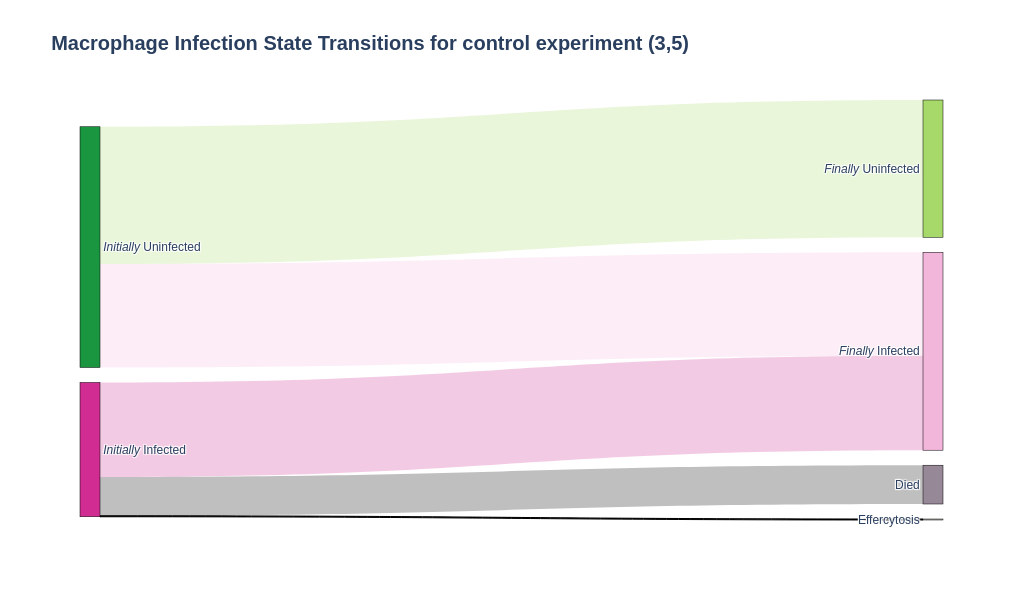

In [257]:
# Define new labels for nodes including "Died"
labels = ["<i>Initially</i> Infected", "<i>Initially</i> Uninfected", "<i>Finally</i> Infected", "<i>Finally</i> Uninfected", "Died", "Effercytosis"]
node_colors =  [colours.expanded_piyg[i] for i in [-1, 0, -2, 1, 2, 3]] # Add a color for "Died", e.g., black

# Update source, target, and value for Sankey diagram including transitions to "Died"
source = [0, 0, 1, 1, 0, 1, 0, 1]  # Add '0' and '1' for transitions from Initially Infected/Uninfected to Died
target = [2, 3, 2, 3, 4, 4, 5, 5]  # Add '4' twice for the new "Died" node
value = [
    N_stayed_infected,     # Initially Infected -> Finally Infected
    N_got_uninfected,      # Initially Infected -> Finally Uninfected
    N_got_infected,        # Initially Uninfected -> Finally Infected
    N_stayed_uninfected,   # Initially Uninfected -> Finally Uninfected
    N_infected_died,       # Initially Infected -> Died
    N_uninfected_died,     # Initially Uninfected -> Died
    N_infected_eff,        # Init Infected -> effero
    N_uninfected_eff       # Init uninfected -> effero
]

# Update link colors if necessary
link_colors = [f'rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.25)' for color in [colours.expanded_piyg[i] for i in [-1, 0, -2, 1]]] + ["rgba(0, 0, 0, 0.25)", "rgba(0, 0, 0, 0.25)"]  # Add link colors for transitions to "Died"

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,        
        color=node_colors  # Set node colors

    ),
    link=dict(
        source=source,
        target=target,
        value=value, 
        color=link_colors
    ))])

fig.update_layout(
    title_text="Macrophage Infection State Transitions for control experiment (3,5)",
    # font_size=12,
    width=800,  # Set the width of the figure
    height=600,  # Set the height of the figure
    font_family="Liberation Sans", 
    title=dict(text="<b>Macrophage Infection State Transitions for control experiment (3,5)<b>", font=dict(size=20),)
)

fig.write_html("WIP-sankey-diagram.html")
fig.show()

In [238]:
trackIDs_got_uninfected

['285.3.5']

In [ ]:
actual_fate = {432:'death',
               441:'death',
               1356:'death',
               1335:'ID_switch',
               310:'unknown',
               297:'unknown',
               285:'efferocytosis',
               112:'death',
               616:'lost',
               592:'ID_switch', 
               93:'ID_switch',
               536:'why is this classified as finally uninfected?',
               507:'death'}

# Tidy sankey plot


In [276]:
# empty lists to record the transitions
infected_to_infected = []
infected_to_uninfected = []
infected_to_effero = []
infected_to_dead = []

dead_to_effero = [] # '491.3.5'

uninfected_to_infected = []
uninfected_to_uninfected = []
uninfected_to_effero = []
uninfected_to_dead = []

effero_to_death = [] # '432.3.5',

# iterate over each cell and pull information from df
for track_ID in df['Unique ID'].unique():
    
    # isolate a single cell information
    subset_df = df[df['Unique ID'] == track_ID]

    # manually changing an exception
    if track_ID in ['536.3.5', '93.3.5', '1335.3.5']: # these cells have a final frame ID switch that changes their final infection status
        # record fate then move onto next ID
        infected_to_infected.append(track_ID)
        continue

    # MANUALLY ADDING EFFEROCYTOSIS
    if track_ID in ['415.3.5',]: # these cells have a final frame ID switch that changes their final infection status
        # record fate then move onto next ID
        infected_to_effero.append(track_ID)
        continue
        
    # Check initial infection status
    initial_infected = all(subset_df.iloc[:3]['Mtb Area µm2'] > min_mtb_area_thresh_µm)
    
    # now check the fate of the initially infected
    if initial_infected:
        
        # check if efferocytosed first
        if track_ID in eff_IDs:
            infected_to_effero.append(track_ID)
            continue
        
        # Check death status
        if track_ID in death_IDs:
            infected_to_dead.append(track_ID)
            continue
            
        # if both other options fail then Check final alive infection status
        if all(subset_df.iloc[-3:]['Mtb Area µm2'] > min_mtb_area_thresh_µm):
            infected_to_infected.append(track_ID)
            continue
        else: 
            infected_to_uninfected.append(track_ID)
            continue
    
    else:
        
        # check if efferocytosed first
        if track_ID in eff_IDs:
            uninfected_to_effero.append(track_ID)
            continue
        
        # Check death status
        if track_ID in death_IDs:
            uninfected_to_dead.append(track_ID)
            continue
            
        # if both other options fail then Check final alive infection status
        if all(subset_df.iloc[-3:]['Mtb Area µm2'] > min_mtb_area_thresh_µm):
            uninfected_to_infected.append(track_ID)
            continue
        else: 
            uninfected_to_uninfected.append(track_ID)
            continue

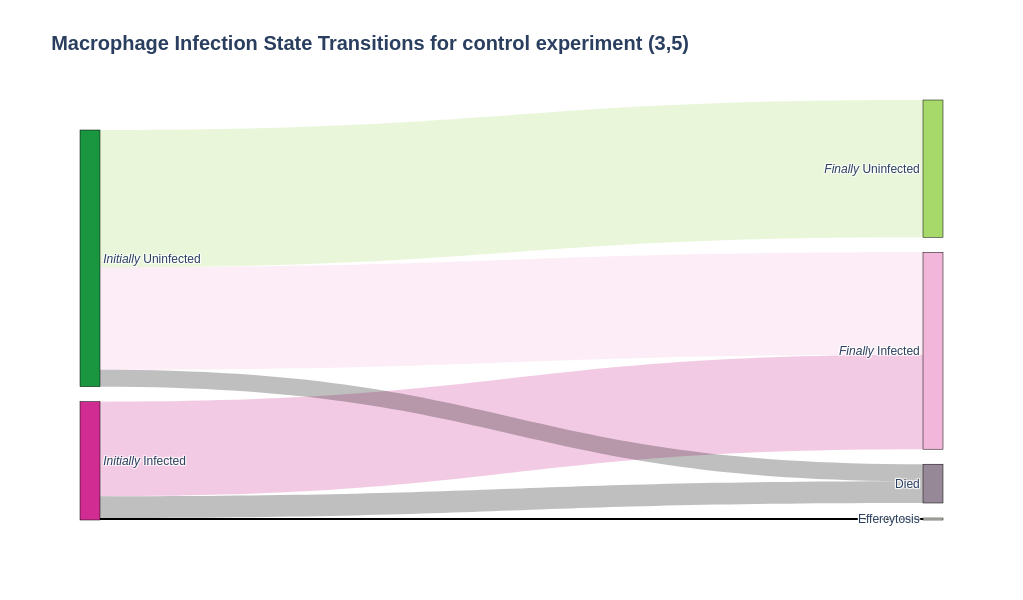

In [277]:
# Define new labels for nodes including "Died"
labels = ["<i>Initially</i> Infected", "<i>Initially</i> Uninfected", "<i>Finally</i> Infected", "<i>Finally</i> Uninfected", "Died", "Effercytosis"]
node_colors =  [colours.expanded_piyg[i] for i in [-1, 0, -2, 1, 2, 3]] # Add a color for "Died", e.g., black

# Update source, target, and value for Sankey diagram including transitions to "Died"
source = [0, 0, 1, 1, 0, 1, 0, 1]  # Add '0' and '1' for transitions from Initially Infected/Uninfected to Died
target = [2, 3, 2, 3, 4, 4, 5, 5]  # Add '4' twice for the new "Died" node
value = [
    len(infected_to_infected),     # Initially Infected -> Finally Infected
    len(infected_to_uninfected),      # Initially Infected -> Finally Uninfected
    len(uninfected_to_infected),        # Initially Uninfected -> Finally Infected
    len(uninfected_to_uninfected),   # Initially Uninfected -> Finally Uninfected
    len(infected_to_dead),       # Initially Infected -> Died
    len(uninfected_to_dead),     # Initially Uninfected -> Died
    len(infected_to_effero),        # Init Infected -> effero
    len(uninfected_to_effero)       # Init uninfected -> effero
]

# Update link colors if necessary
link_colors = [f'rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.25)' for color in [colours.expanded_piyg[i] for i in [-1, 0, -2, 1]]] + ["rgba(0, 0, 0, 0.25)", "rgba(0, 0, 0, 0.25)"]  # Add link colors for transitions to "Died"

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,        
        color=node_colors  # Set node colors

    ),
    link=dict(
        source=source,
        target=target,
        value=value, 
        color=link_colors
    ))])

fig.update_layout(
    title_text="Macrophage Infection State Transitions for control experiment (3,5)",
    # font_size=12,
    width=800,  # Set the width of the figure
    height=600,  # Set the height of the figure
    font_family="Liberation Sans", 
    title=dict(text="<b>Macrophage Infection State Transitions for control experiment (3,5)<b>", font=dict(size=20),)
)

fig.write_html("WIP-sankey-diagram.html")
fig.show()

# Adding efferocytoses classifcations

## At the moment will efferoctyoses be included in my true track df? yes! checking dead cells for eff

In [269]:
for list_ in [infected_to_infected,     # Initially Infected -> Finally Infected
    infected_to_uninfected,      # Initially Infected -> Finally Uninfected
    uninfected_to_infected,        # Initially Uninfected -> Finally Infected
    uninfected_to_uninfected,   # Initially Uninfected -> Finally Uninfected
    infected_to_dead,       # Initially Infected -> Died
    uninfected_to_dead,     # Initially Uninfected -> Died
    infected_to_effero,        # Init Infected -> effero
    uninfected_to_effero]:
    print('415.3.5' in list_)

False
False
True
False
False
False
False
False


In [274]:
import seaborn as sns

In [278]:
infected_to_dead

['252.3.5',
 '486.3.5',
 '507.3.5',
 '515.3.5',
 '530.3.5',
 '542.3.5',
 '1611.3.5',
 '1118.3.5',
 '3179.3.5',
 '110.3.5',
 '112.3.5',
 '119.3.5',
 '1356.3.5',
 '384.3.5',
 '410.3.5',
 '426.3.5',
 '431.3.5',
 '432.3.5',
 '461.3.5',
 '473.3.5',
 '997.3.5',
 '491.3.5']

In [279]:
uninfected_to_dead

['107.3.5',
 '144.3.5',
 '15.3.5',
 '444.3.5',
 '552.3.5',
 '26.3.5',
 '34.3.5',
 '642.3.5',
 '131.3.5',
 '204.3.5',
 '1308.3.5',
 '286.3.5',
 '344.3.5',
 '354.3.5',
 '397.3.5',
 '424.3.5',
 '493.3.5']

# Adding loops

I.e. dead to eff to dead

In [359]:
eff_IDs = ['285.3.5', '432.3.5']
eff_IDs

['285.3.5', '432.3.5']

In [425]:
'204.3.5' in death_IDs

True

In [441]:
# empty lists to record the transitions
infected_to_infected = []
infected_to_uninfected = []
infected_to_effero = []
infected_to_dead = []

dead_to_effero = [] # '491.3.5'
dead_to_phago = [] # '491.3.5'

uninfected_to_infected = []
uninfected_to_uninfected = []
uninfected_to_effero = []
uninfected_to_dead = []

effero_to_dead = [] # '432.3.5',

## create boundary condition
boundary_upper = 1200
boundary_lower = 0
threshold = 7
boundary_tracks =[]

# iterate over each cell and pull information from df
for track_ID in df['Unique ID'].unique():
    
    # isolate a single cell information
    subset_df = df[df['Unique ID'] == track_ID]
    
    # Check if the last values of 'x' or 'y' are within 5 pixels of either boundary
    if ((abs(subset_df['x'].iloc[-1] - boundary_upper) <= threshold) or 
        (abs(subset_df['x'].iloc[-1] - boundary_lower) <= threshold) or
        (abs(subset_df['y'].iloc[-1] - boundary_upper) <= threshold) or
        (abs(subset_df['y'].iloc[-1] - boundary_lower) <= threshold)):
        boundary_tracks.append(track_ID)
        continue
    
    # Check initial infection status (ignoring nan values)
    initial_infected = all(subset_df.dropna()['Mtb Area µm2'].iloc[:3] > min_mtb_area_thresh_µm)

    ####################################################INIT INFECTED
    # now check the fate of the initially infected
    if initial_infected:
        
        # check if efferocytosed first
        if track_ID in eff_IDs or track_ID in ['415.3.5','285.3.5']: # manually adding some effero
            infected_to_effero.append(track_ID)

            # now see if any effero then die (manually identified)
            if track_ID in ['432.3.5', ]:
                effero_to_dead.append(track_ID)
                # continue # remove the continue statement here because a dead cell can also be efferocytosed

        # Check death status
        if track_ID in death_IDs or track_ID in ['507.3.5', '112.3.5']: # manually correcting last min ID switch       
            infected_to_dead.append(track_ID)

            # now see if any dead cells are efferocytosed (manually identified)
            if track_ID in ['491.3.5', '432.3.5', '112.3.5']:
                dead_to_effero.append(track_ID)
                # continue  # remove the continue statement here because an efferocytosed cell can also later die

        # if both other options fail then Check final alive infection status
        
        if all(subset_df.dropna()['Mtb Area µm2'].iloc[-3:] > min_mtb_area_thresh_µm) or track_ID in ['536.3.5', '93.3.5', '1335.3.5']:
            infected_to_infected.append(track_ID)
            continue
        else: 
            infected_to_uninfected.append(track_ID)
                 
            continue

    ####################################################INIT UNINFECTED
    else:
        
        # check if efferocytosed first
        if track_ID in eff_IDs:
            uninfected_to_effero.append(track_ID)

            # now see if any effero then die (manually identified)
            if track_ID in ['', ]:
                effero_to_death.append(track_ID)
                continue

            # continue anyway 
            continue 
        
        # Check death status
        if track_ID in death_IDs or track_ID in ['204.3.5']: # boundary case that looks like it dies
            uninfected_to_dead.append(track_ID)
            
            # now see if any dead cells are efferocytosed (manually identified)
            if track_ID in ['', ]:
                dead_to_effero.append(track_ID)
                continue

            # continue afterwards
            continue
            
            
        # if both other options fail then Check final alive infection status (ignoring nan values)
        if all(subset_df.iloc[-3:]['Mtb Area µm2'] > min_mtb_area_thresh_µm):
            uninfected_to_infected.append(track_ID)
            continue
        else: 
            uninfected_to_uninfected.append(track_ID)
            continue

## manually correcting last min id switches 
infected_to_uninfected.remove('507.3.5') # manually correcting last min ID switch 
infected_to_uninfected.remove('112.3.5') # last min id switch because of cell death then effero
infected_to_uninfected.remove('499.3.5') # dead then eff
infected_to_uninfected.remove('285.3.5') # eff

In [445]:
# empty lists to record the transitions
infected_to_infected = []
infected_to_uninfected = []
infected_to_effero = []
infected_to_dead = []

dead_to_effero = [] # '491.3.5'
dead_to_phago = [] # '491.3.5'

uninfected_to_infected = []
uninfected_to_uninfected = []
uninfected_to_effero = []
uninfected_to_dead = []

effero_to_dead = [] # '432.3.5',

## create boundary condition
boundary_upper = 1200
boundary_lower = 0
threshold = 7
boundary_tracks =[]

# iterate over each cell and pull information from df
for track_ID in df['Unique ID'].unique():
    
    # isolate a single cell information
    subset_df = df[df['Unique ID'] == track_ID]
    
    # Check if the last values of 'x' or 'y' are within 5 pixels of either boundary
    if ((abs(subset_df['x'].iloc[-1] - boundary_upper) <= threshold) or 
        (abs(subset_df['x'].iloc[-1] - boundary_lower) <= threshold) or
        (abs(subset_df['y'].iloc[-1] - boundary_upper) <= threshold) or
        (abs(subset_df['y'].iloc[-1] - boundary_lower) <= threshold)):
        boundary_tracks.append(track_ID)
        continue
    
    # Check initial infection status (ignoring nan values)
    initial_infected = all(subset_df.dropna()['Mtb Area µm2'].iloc[:3] > min_mtb_area_thresh_µm)

    ####################################################INIT INFECTED
    # now check the fate of the initially infected
    if initial_infected:
        
        # check if efferocytosed first
        if track_ID in eff_IDs or track_ID in ['415.3.5','285.3.5']: # manually adding some effero
            infected_to_effero.append(track_ID)

            # now see if any effero then die (manually identified)
            if track_ID in ['432.3.5', ]:
                effero_to_dead.append(track_ID)
                # continue # remove the continue statement here because a dead cell can also be efferocytosed

        # Check death status
        if track_ID in death_IDs or track_ID in ['507.3.5', '112.3.5']: # manually correcting last min ID switch       
            infected_to_dead.append(track_ID)

            # now see if any dead cells are efferocytosed (manually identified)
            if track_ID in ['491.3.5', '432.3.5', '112.3.5']:
                dead_to_effero.append(track_ID)
                # continue  # remove the continue statement here because an efferocytosed cell can also later die

        # if both other options fail then Check final alive infection status
        
        if all(subset_df.dropna()['Mtb Area µm2'].iloc[-3:] > min_mtb_area_thresh_µm) or track_ID in ['536.3.5', '93.3.5', '1335.3.5']:
            infected_to_infected.append(track_ID)
            continue
        else: 
            infected_to_uninfected.append(track_ID)
                 
            continue

    ####################################################INIT UNINFECTED
    # check the fate of the initially uninfected
    else:
        
            
        # check if efferocytosed first
        if track_ID in eff_IDs or track_ID in []: # manually adding some effero
            uninfected_to_effero.append(track_ID)

            # now see if any effero then die (manually identified)
            if track_ID in []:
                effero_to_dead.append(track_ID)
                # continue # remove the continue statement here because a dead cell can also be efferocytosed

        # Check death status
        if track_ID in death_IDs or track_ID in ['204.3.5']: # manually correcting last min ID switch       
            uninfected_to_dead.append(track_ID)

            # now see if any dead cells are efferocytosed (manually identified)
            if track_ID in []:
                dead_to_effero.append(track_ID)
                # continue  # remove the continue statement here because an efferocytosed cell can also later die

        # if both other options fail then Check final alive infection status
        
        if all(subset_df.dropna()['Mtb Area µm2'].iloc[-3:] > min_mtb_area_thresh_µm) or track_ID in []:
            uninfected_to_infected.append(track_ID)
            continue
        else: 
            uninfected_to_uninfected.append(track_ID)
                 
            continue

## manually correcting last min id switches 
infected_to_uninfected.remove('507.3.5') # manually correcting last min ID switch 
infected_to_uninfected.remove('112.3.5') # last min id switch because of cell death then effero
infected_to_uninfected.remove('499.3.5') # dead then eff
infected_to_uninfected.remove('285.3.5') # eff

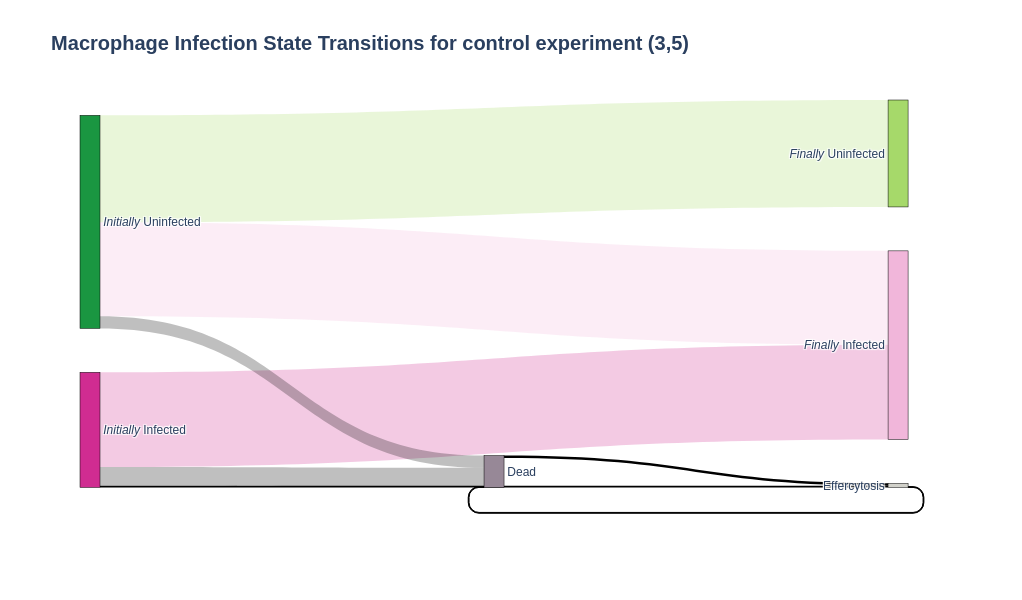

In [447]:
# Define new labels for nodes including "Died"
labels = ["<i>Initially</i> Infected", "<i>Initially</i> Uninfected", "<i>Finally</i> Infected", "<i>Finally</i> Uninfected", "Dead", "Effercytosis"]
node_colors =  [colours.expanded_piyg[i] for i in [-1, 0, -2, 1, 2, 3]] # Add a color for "Died", e.g., black

# Update source, target, and value for Sankey diagram including transitions to "Died"
cell_state = {'Infected t0': 0, 
               'Uninfected t0': 1, 
               'Infected t-1': 2, 
               'Uninfected t-1': 3, 
               'Dead t-1': 4, 
               'Efferocytosis t-1': 5,              }

source_names = ['Infected t0', 'Infected t0', 'Uninfected t0', 'Uninfected t0', 'Infected t0', 'Uninfected t0', 'Infected t0', 'Uninfected t0', 'Dead t-1', 'Efferocytosis t-1']
target_names = ['Infected t-1', 'Uninfected t-1', 'Infected t-1', 'Uninfected t-1', 'Dead t-1', 'Dead t-1', 'Efferocytosis t-1', 'Efferocytosis t-1', 'Efferocytosis t-1', 'Dead t-1']

# Replace entries with their corresponding dictionary values
source = [cell_state[state] for state in source_names]
target = [cell_state[state] for state in target_names]  

value = [
    len(infected_to_infected),     # Initially Infected -> Finally Infected
    len(infected_to_uninfected),      # Initially Infected -> Finally Uninfected
    len(uninfected_to_infected),        # Initially Uninfected -> Finally Infected
    len(uninfected_to_uninfected),   # Initially Uninfected -> Finally Uninfected
    len(infected_to_dead),       # Initially Infected -> Died
    len(uninfected_to_dead),     # Initially Uninfected -> Died
    len(infected_to_effero),        # Init Infected -> effero
    len(uninfected_to_effero),       # Init uninfected -> effero
    len(dead_to_effero),        #dead to effero
    len(effero_to_dead),       # effero to dead
]

link_labels = [
    [i.split('.')[0] for i in infected_to_infected],     # Initially Infected -> Finally Infected
    infected_to_uninfected,   # Initially Infected -> Finally Uninfected
    uninfected_to_infected,   # Initially Uninfected -> Finally Infected
    uninfected_to_uninfected, # Initially Uninfected -> Finally Uninfected
    infected_to_dead,         # Initially Infected -> Died
    uninfected_to_dead,       # Initially Uninfected -> Died
    infected_to_effero,       # Initially Infected -> Efferocytosis
    uninfected_to_effero,     # Initially Uninfected -> Efferocytosis
    dead_to_effero,           # Dead -> Efferocytosis
    effero_to_dead          # Efferocytosis -> Dead
] #[i for i in zip(source_names, target_names)]
# Update link colors if necessary
link_colors = [f'rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.25)' for color in [colours.expanded_piyg[i] for i in [-1, 0, -2, 1]]] + ["rgba(0, 0, 0, 0.25)", "rgba(0, 0, 0, 0.25)"]  # Add link colors for transitions to "Died"

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,        
        color=node_colors  # Set node colors

    ),
    link=dict(
        source=source,
        target=target,
        value=value, 
        color=link_colors, 
        label=link_labels
    ))])

fig.update_layout(
    title_text="Macrophage Infection State Transitions for control experiment (3,5)",
    # font_size=12,
    width=800,  # Set the width of the figure
    height=600,  # Set the height of the figure
    font_family="Liberation Sans", 
    title=dict(text="<b>Macrophage Infection State Transitions for control experiment (3,5)<b>", font=dict(size=20),)
)

fig.write_html("WIP-sankey-diagram.html")
fig.show()

In [342]:
for list_ in [infected_to_infected,     # Initially Infected -> Finally Infected
    infected_to_uninfected,      # Initially Infected -> Finally Uninfected
    uninfected_to_infected,        # Initially Uninfected -> Finally Infected
    uninfected_to_uninfected,   # Initially Uninfected -> Finally Uninfected
    infected_to_dead,       # Initially Infected -> Died
    uninfected_to_dead,     # Initially Uninfected -> Died
    infected_to_effero,        # Init Infected -> effero
    uninfected_to_effero, 
    dead_to_effero,
    effero_to_death]:
    print('485.3.5' in list_)

False
False
False
False
False
False
False
False
False
False


In [452]:
# Create a list of lists
lists = [
    infected_to_infected,
    infected_to_uninfected,
    uninfected_to_infected,
    uninfected_to_uninfected,
    infected_to_dead,
    uninfected_to_dead,
    infected_to_effero,
    uninfected_to_effero,
    dead_to_effero,
    effero_to_death,
]

# Find the maximum length among all lists
max_length = max(len(lst) for lst in lists)

# Pad shorter lists with None (or NaN if using numpy) to make them of equal length
def pad_list(lst, length, pad_value=None):
    return lst + [pad_value] * (length - len(lst))
    
# Define column names based on the original variable names
column_names = [
    "infected_to_infected",
    "infected_to_uninfected",
    "uninfected_to_infected",
    "uninfected_to_uninfected",
    "infected_to_dead",
    "uninfected_to_dead",
    "infected_to_effero",
    "uninfected_to_effero",
    "dead_to_effero",
    "effero_to_death",
]

# Create a dictionary of data to create the DataFrame
data = {column_name: pad_list(lst, max_length) for column_name, lst in zip(column_names, lists)}

# Create a DataFrame
class_df = pd.DataFrame(data)

In [453]:
class_df

,infected_to_infected,infected_to_uninfected,uninfected_to_infected,uninfected_to_uninfected,infected_to_dead,uninfected_to_dead,infected_to_effero,uninfected_to_effero,dead_to_effero,effero_to_death
0,1.3.5,None,108.3.5,107.3.5,252.3.5,107.3.5,285.3.5,None,112.3.5,None
1,115.3.5,None,109.3.5,142.3.5,486.3.5,144.3.5,432.3.5,None,432.3.5,None
2,117.3.5,None,118.3.5,147.3.5,507.3.5,15.3.5,None,None,491.3.5,None
3,134.3.5,None,138.3.5,156.3.5,515.3.5,444.3.5,None,None,None,None
4,178.3.5,None,144.3.5,161.3.5,530.3.5,552.3.5,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
126,None,None,None,988.3.5,None,None,None,None,None,None
127,None,None,None,1506.3.5,None,None,None,None,None,None
128,None,None,None,2024.3.5,None,None,None,None,None,None
129,None,None,None,1007.3.5,None,None,None,None,None,None


In [465]:
# Find columns that end with "to_dead"
to_dead_columns = [col for col in class_df.columns if col.endswith("to_dead")]

# Create a list of IDs from the "to_dead" columns
list_of_dead_ids = []

for col_name in to_dead_columns:
    list_of_dead_ids.extend([id for id in class_df[col_name] if id is not None])


In [466]:
list_of_dead_ids

['252.3.5',
 '486.3.5',
 '507.3.5',
 '515.3.5',
 '530.3.5',
 '542.3.5',
 '1611.3.5',
 '1118.3.5',
 '3179.3.5',
 '110.3.5',
 '112.3.5',
 '119.3.5',
 '1356.3.5',
 '384.3.5',
 '410.3.5',
 '424.3.5',
 '426.3.5',
 '431.3.5',
 '432.3.5',
 '461.3.5',
 '473.3.5',
 '997.3.5',
 '491.3.5',
 '107.3.5',
 '144.3.5',
 '15.3.5',
 '444.3.5',
 '552.3.5',
 '26.3.5',
 '34.3.5',
 '642.3.5',
 '131.3.5',
 '1308.3.5',
 '286.3.5',
 '344.3.5',
 '354.3.5',
 '397.3.5',
 '493.3.5']

In [477]:
search_id = '252.3.5'
matching_columns = [col for col in class_df.columns if search_id in class_df[col].values]
print(matching_columns)

['infected_to_infected', 'infected_to_dead']


### Record fate and tidy up previous columns

In [518]:
death_IDs

['432.3.5',
 '431.3.5',
 '354.3.5',
 '397.3.5',
 '426.3.5',
 '424.3.5',
 '1308.3.5',
 '384.3.5',
 '1611.3.5',
 '473.3.5',
 '491.3.5',
 '3179.3.5',
 '486.3.5',
 '515.3.5',
 '15.3.5',
 '34.3.5',
 '119.3.5',
 '112.3.5',
 '26.3.5',
 '110.3.5',
 '144.3.5',
 '252.3.5',
 '286.3.5',
 '107.3.5',
 '444.3.5',
 '530.3.5',
 '542.3.5',
 '552.3.5',
 '1118.3.5',
 '642.3.5',
 '131.3.5',
 '204.3.5',
 '1356.3.5',
 '344.3.5',
 '410.3.5',
 '461.3.5',
 '997.3.5',
 '493.3.5',
 '507.3.5']

In [496]:
df['t0 Mphi state'] = None # inf/uninf
df['t-1 Mphi state'] = None # dead/alive
df['Fate mechanism'] = None # dead/alive

### List of strings

In [515]:
for ID in df['Unique ID'].unique():
    # Isolate one track
    subset_df = df[df['Unique ID'] == ID]

    # Check initial infection status and store as a list using apply
    initial_infected = 'Infected' if all(subset_df.dropna()['Mtb Area µm2'].iloc[:3] > min_mtb_area_thresh_µm) else 'Uninfected'
    df.loc[df['Unique ID'] == ID, 't0 Mphi state'] = df[df['Unique ID'] == ID].apply(lambda x: ['Alive', initial_infected], axis=1) # assuming all cells are initially alive

    # Check final status of cell
    final_status = 'Alive' if ID not in death_IDs else 'Dead'
    
    # Check final infection status
    final_infected = 'Infected' if all(subset_df.dropna()['Mtb Area µm2'].iloc[-3:] > min_mtb_area_thresh_µm) else 'Uninfected'
    
    # Apply the list to each row individually for the final state
    df.loc[df['Unique ID'] == ID, 't-1 Mphi state'] = df[df['Unique ID'] == ID].apply(lambda x: [final_status, final_infected], axis=1)


### Str

In [572]:
for ID in df['Unique ID'].unique():
    # Isolate one track
    subset_df = df[df['Unique ID'] == ID]

    # Check initial infection status and store as a string
    initial_infected = 'Infected' if all(subset_df.dropna()['Mtb Area µm2'].iloc[:3] > min_mtb_area_thresh_µm) else 'Uninfected'
    # Assuming all cells are initially alive
    df.loc[df['Unique ID'] == ID, 't0 Mphi state'] = 'Alive ' + initial_infected

    # Check final status of cell
    final_status = 'Alive' if ID not in death_IDs else 'Dead'

    # Check final infection status
    final_infected = 'Infected' if all(subset_df.dropna()['Mtb Area µm2'].iloc[-3:] > min_mtb_area_thresh_µm) else 'Uninfected'

    # Combine final status and infection status into a single string
    df.loc[df['Unique ID'] == ID, 't-1 Mphi state'] = final_status + ' ' + final_infected


In [573]:
df[df['Unique ID'] == '1308.3.5']

,Time (hours),Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,Mphi GFP,x,y,Eccentricity,MSD,Technical Replicate,Strain/Compound,Mtb Area µm2,Mtb RFP,Mtb RFP thresholded,t0 Mphi state,t-1 Mphi state
18627,10,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,66490.0,1822.146851,843.842712,381.003876,0.670594,0.000000,1,CTRL,0.000000,353.483704,0.000000,Alive Uninfected,Dead Infected
18628,11,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,69971.0,1983.233643,844.097778,378.465302,0.535345,2.551356,1,CTRL,0.000000,353.994598,0.000000,Alive Uninfected,Dead Infected
18629,12,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,71415.0,1926.592651,843.028748,376.889587,0.562750,1.904128,1,CTRL,0.000000,353.556213,0.000000,Alive Uninfected,Dead Infected
18630,13,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,70834.0,1717.111328,844.500061,375.567993,0.763234,1.977720,1,CTRL,0.000000,353.496857,0.000000,Alive Uninfected,Dead Infected
18631,14,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,70004.0,1841.804688,836.412903,373.497833,0.522350,8.347915,1,CTRL,0.000000,352.161011,0.000000,Alive Uninfected,Dead Infected
18632,15,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,94673.0,1886.175537,839.445251,378.916351,0.826532,6.209306,1,CTRL,31.556028,385.239929,42.073494,Alive Uninfected,Dead Infected
18633,16,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,79930.0,1985.608765,844.435059,369.149872,0.838132,10.967329,1,CTRL,0.000000,355.661011,0.000000,Alive Uninfected,Dead Infected
18634,17,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,64725.0,2071.431641,842.815002,374.084076,0.875550,5.193357,1,CTRL,0.000000,355.006470,0.000000,Alive Uninfected,Dead Infected
18635,18,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,70011.0,1762.133057,834.450562,370.792053,0.647979,8.988954,1,CTRL,0.000000,351.914429,0.000000,Alive Uninfected,Dead Infected
18636,19,WT,CTRL,EC0,1308.3.5,"(3, 5)",1308,72143.0,1963.506470,843.193237,368.709564,0.828583,8.987277,1,CTRL,0.000000,354.258789,0.000000,Alive Uninfected,Dead Infected


In [527]:
sources = df.drop_duplicates(subset='Unique ID', keep='first')['t0 Mphi state']\
targets = df.drop_duplicates(subset='Unique ID', keep='first')['t-1 Mphi state']

In [575]:
# Update source, target, and value for Sankey diagram including transitions to "Died"
cell_state = {'Alive Infected t0': 0, 
              'Alive Uninfected t0': 1, 
              'Dead Infected t0': 2,
              'Dead Uninfected t0': 3,
              'Alive Infected t-1': 4, 
              'Alive Uninfected t-1': 5, 
              'Dead Infected t-1': 6,
              'Dead Uninfected t-1': 7,
             }
              
source_names = [
    'Alive Infected t0', 'Alive Infected t0', 'Alive Infected t0', 'Alive Infected t0',
    'Alive Uninfected t0', 'Alive Uninfected t0', 'Alive Uninfected t0', 'Alive Uninfected t0',
    'Dead Infected t0', 'Dead Infected t0', 'Dead Infected t0', 'Dead Infected t0',
    'Dead Uninfected t0', 'Dead Uninfected t0', 'Dead Uninfected t0', 'Dead Uninfected t0'
]

target_names = [
    'Alive Infected t-1', 'Alive Uninfected t-1', 'Dead Infected t-1', 'Dead Uninfected t-1',
    'Alive Infected t-1', 'Alive Uninfected t-1', 'Dead Infected t-1', 'Dead Uninfected t-1',
    'Alive Infected t-1', 'Alive Uninfected t-1', 'Dead Infected t-1', 'Dead Uninfected t-1',
    'Alive Infected t-1', 'Alive Uninfected t-1', 'Dead Infected t-1', 'Dead Uninfected t-1'
]
# Replace entries with their corresponding dictionary values
source = [cell_state[state] for state in source_names]
target = [cell_state[state] for state in target_names]  

In [599]:
# Initialize a dictionary to count transitions
transition_counts = {(s, t): 0 for s in source_names for t in target_names}

# Iterate over the DataFrame to count transitions
for index, row in df.iterrows():
    t0_state = row['t0 Mphi state'] + ' t0'  # Assuming the column is named 't0 Mphi state'
    t1_state = row['t-1 Mphi state'] + ' t-1'  # Assuming the column is named 't-1 Mphi state'

    # Increment the count for the transition
    if (t0_state, t1_state) in transition_counts:
        transition_counts[(t0_state, t1_state)] += 1

# Populate the values array
values = [transition_counts[(s, t)] for s, t in zip(source_names, target_names)]

In [601]:
row['Unique ID']

'1015.3.5'

In [600]:
values

[5943, 238, 1190, 113, 6461, 7668, 640, 326, 0, 0, 0, 0, 0, 0, 0, 0]

In [603]:
transition_cell_ids

{('Alive Infected t0', 'Alive Infected t-1'): [],
 ('Alive Infected t0', 'Alive Uninfected t-1'): [],
 ('Alive Infected t0', 'Dead Infected t-1'): [],
 ('Alive Infected t0', 'Dead Uninfected t-1'): [],
 ('Alive Uninfected t0', 'Alive Infected t-1'): [],
 ('Alive Uninfected t0', 'Alive Uninfected t-1'): [],
 ('Alive Uninfected t0', 'Dead Infected t-1'): [],
 ('Alive Uninfected t0', 'Dead Uninfected t-1'): [],
 ('Dead Infected t0', 'Alive Infected t-1'): [],
 ('Dead Infected t0', 'Alive Uninfected t-1'): [],
 ('Dead Infected t0', 'Dead Infected t-1'): [],
 ('Dead Infected t0', 'Dead Uninfected t-1'): [],
 ('Dead Uninfected t0', 'Alive Infected t-1'): [],
 ('Dead Uninfected t0', 'Alive Uninfected t-1'): [],
 ('Dead Uninfected t0', 'Dead Infected t-1'): [],
 ('Dead Uninfected t0', 'Dead Uninfected t-1'): []}

1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
1.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
107.3.5
10

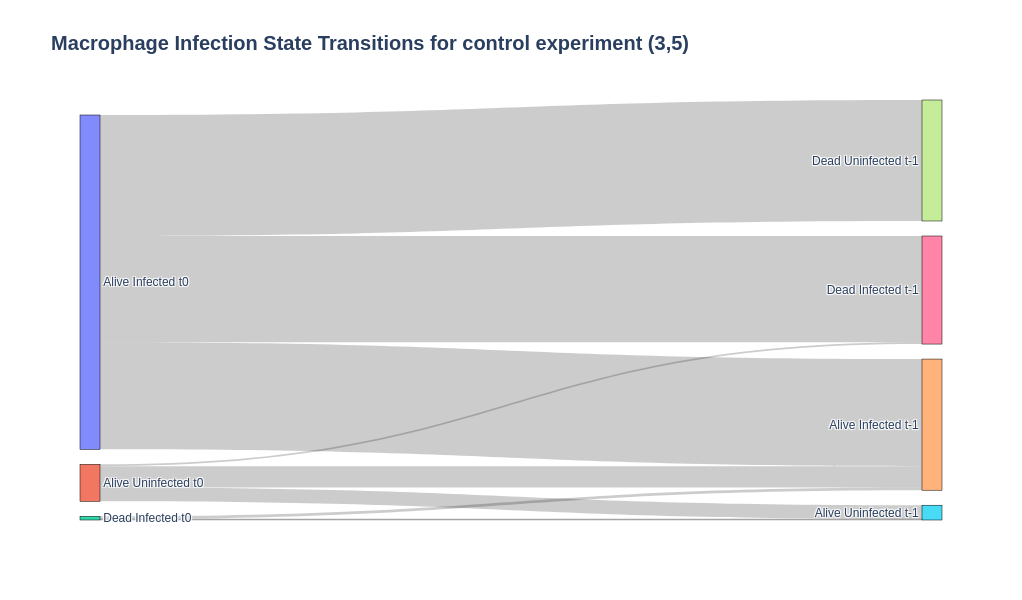

In [604]:
# # Define new labels for nodes including "Died"
# labels = ["<i>Initially</i> Infected", "<i>Initially</i> Uninfected", "<i>Finally</i> Infected", "<i>Finally</i> Uninfected", "Dead", "Effercytosis"]
# node_colors =  [colours.expanded_piyg[i] for i in [-1, 0, -2, 1, 2, 3]] # Add a color for "Died", e.g., black
labels = list(cell_state.keys())

# Update source, target, and value for Sankey diagram including transitions to "Died"
cell_state = {'Alive Infected t0': 0, 
              'Alive Uninfected t0': 1, 
              'Dead Infected t0': 2,
              'Dead Uninfected t0': 3,
              'Alive Infected t-1': 4, 
              'Alive Uninfected t-1': 5, 
              'Dead Infected t-1': 6,
              'Dead Uninfected t-1': 7,
             }
              
source_names = [
    'Alive Infected t0', 'Alive Infected t0', 'Alive Infected t0', 'Alive Infected t0',
    'Alive Uninfected t0', 'Alive Uninfected t0', 'Alive Uninfected t0', 'Alive Uninfected t0',
    'Dead Infected t0', 'Dead Infected t0', 'Dead Infected t0', 'Dead Infected t0',
    'Dead Uninfected t0', 'Dead Uninfected t0', 'Dead Uninfected t0', 'Dead Uninfected t0'
]

target_names = [
    'Alive Infected t-1', 'Alive Uninfected t-1', 'Dead Infected t-1', 'Dead Uninfected t-1',
    'Alive Infected t-1', 'Alive Uninfected t-1', 'Dead Infected t-1', 'Dead Uninfected t-1',
    'Alive Infected t-1', 'Alive Uninfected t-1', 'Dead Infected t-1', 'Dead Uninfected t-1',
    'Alive Infected t-1', 'Alive Uninfected t-1', 'Dead Infected t-1', 'Dead Uninfected t-1'
]
# Replace entries with their corresponding dictionary values
source = [cell_state[state] for state in source_names]
target = [cell_state[state] for state in target_names]  

# Initialize a dictionary to store cell IDs for each transition
transition_cell_ids = {(s, t): [] for s in source_names for t in target_names}

# Iterate over the DataFrame to append cell IDs for each transition
for index, row in df.iterrows():
    t0_state = row['t0 Mphi state']  # Assuming the column is named 't0 Mphi state'
    t1_state = row['t-1 Mphi state']  # Assuming the column is named 't-1 Mphi state'
    cell_id = row['Unique ID']  # Assuming the column is named 'Unique Cell ID'
    print(cell_id)
    # Append the cell ID for the transition
    transition_key = (t0_state, t1_state)
    if transition_key in transition_cell_ids:
        transition_cell_ids[transition_key].append(cell_id)

# Populate the values array by counting the number of cell IDs for each transition
values = [len(transition_cell_ids[(s, t)]) for s, t in zip(source_names, target_names)]

link_labels = [
       transition_cell_ids[(s, t)] for s, t in zip(source_names, target_names)
] #[i for i in zip(source_names, target_names)]
# # Update link colors if necessary
# link_colors = [f'rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.25)' for color in [colours.expanded_piyg[i] for i in [-1, 0, -2, 1]]] + ["rgba(0, 0, 0, 0.25)", "rgba(0, 0, 0, 0.25)"]  # Add link colors for transitions to "Died"

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,        
        # color=node_colors  # Set node colors

    ),
    link=dict(
        source=source,
        target=target,
        value=value, 
        # color=link_colors, 
        label=link_labels
    ))])

fig.update_layout(
    title_text="Macrophage Infection State Transitions for control experiment (3,5)",
    # font_size=12,
    width=800,  # Set the width of the figure
    height=600,  # Set the height of the figure
    font_family="Liberation Sans", 
    title=dict(text="<b>Macrophage Infection State Transitions for control experiment (3,5)<b>", font=dict(size=20),)
)

fig.write_html("WIP-sankey-diagram_v2.html")
fig.show()

In [594]:
link_labels

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [598]:
values

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]